In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
'''
Returns the sum of 2 vectors of not necesseraly the same length by appending 0's to the shorter vector.
'''
def sum_two_vec_pad(a, b):
    if len(a) < len(b):
        c = b.copy()
        c[:len(a)] += a
    else:
        c = a.copy()
        c[:len(b)] += b
    return c

'''
returns the energy for an estimated weight vector omega, with data (X, Y)
'''
def energy(w, X, Y):
    Y_est = np.sign(np.dot(X, w))
    return 0.5 * np.sum((Y - Y_est)**2)

def accept_prob(wp, w, beta, X, Y):
    return min(1, np.exp(-beta*(energy(wp, X, Y) - energy(w, X, Y))))

def overlap(wp, w):
    return 1.0 / (w.shape[0]) * np.dot(w, wp)

In [70]:
###

### Part 1

###


################ 1.

def metropolis(w_init, beta, X, Y, epsilon, T):

    N = w_init.shape[0]
    M = X.shape[0]
    w = np.copy(w_init)
    wp = np.copy(w)

    energy_record = np.array([])
    energy_record = np.append(energy_record, energy(w_init, X, Y))
    
    count = 0
    while (energy(w, X, Y)/M > epsilon) and count < T:

        index_rand = np.random.randint(0, N)
        wp = np.copy(w)
        wp[index_rand] = -1 * wp[index_rand]

        if np.random.uniform() < accept_prob(wp, w, beta, X, Y):
            w = np.copy(wp)

        energy_record= np.append(energy_record, energy(w, X, Y))
        count += 1
    return w, energy_record

def metropolis_mult(nb_runs, beta, M, N, epsilon, T):
    energy_record_acc = np.zeros(N)

    for k in range(0, nb_runs):
        w = 2 * np.random.random_integers(0, 1, N) - 1
        X = np.random.randn(M, N)
        Y = np.sign(np.dot(X, w))
        
        w_init =  2 * np.random.random_integers(0, 1, N) - 1
        _, energy_record = metropolis(w_init, beta, X, Y, epsilon, T)
        energy_record_acc = sum_two_vec_pad(energy_record_acc, energy_record)


    return energy_record_acc / nb_runs

In [87]:
# Tests for part 1.

# alpha and beta in [0.5, 5], for 'interesting' results as per paper.
N = 40
alphas = [0.5,2.5,5]
betas = [0.6,1,1.4]
nb_runs = 100
epsilon = 0
T = 5000
results = []

for alpha in alphas:
    for beta in betas:
        print(alpha, beta)
        result_tmp = metropolis_mult(nb_runs, beta, int(N*alpha), N, epsilon, T)
        results.append(result_tmp)

0.5 0.6


C:\Users\furkan\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
C:\Users\furkan\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


0.5 1
0.5 1.4
2.5 0.6
2.5 1
2.5 1.4
5 0.6
5 1
5 1.4


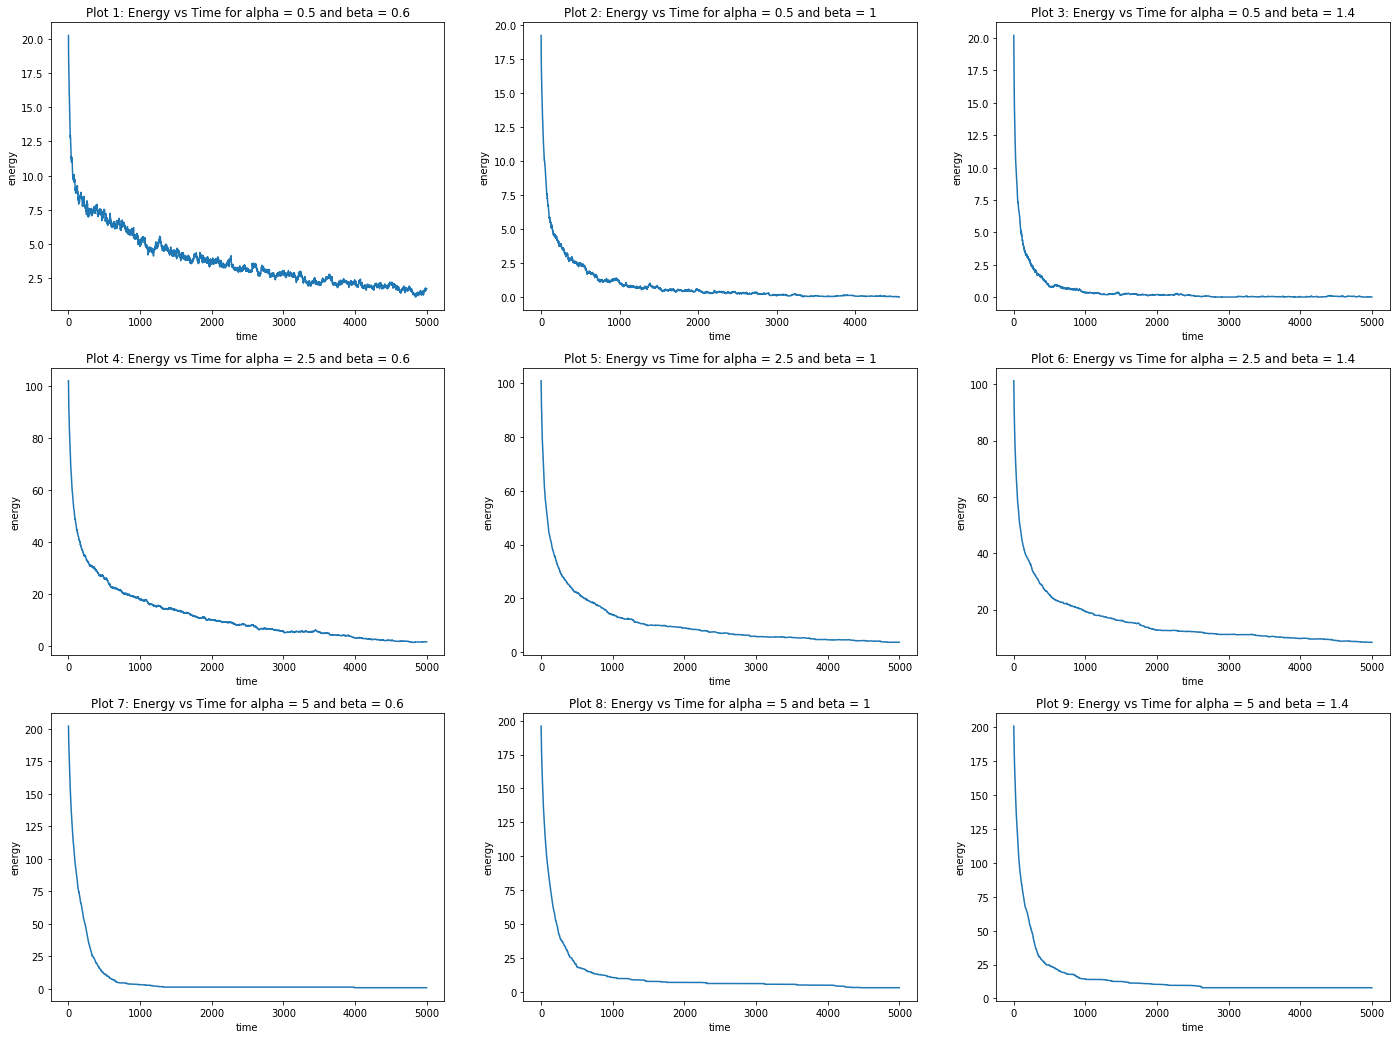

In [88]:
figs, axes = plt.subplots(nrows=len(alphas), ncols=len(betas), figsize=(24,18));
count = 0
for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        results_tmp = results[count]
        axes[i, j].plot(results_tmp[:T]);
        axes[i, j].set_xlabel("time");
        axes[i, j].set_ylabel("energy");
        axes[i, j].set_title("Plot {}: Energy vs Time for alpha = {} and beta = {}".format(count+1, alpha, beta))
        count += 1

In [90]:
figs.savefig("part1t.png")
figs.savefig("part1_tight.png", bbox_inches="tight")